In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m1=[4,4]
m2=[8,8]

cov1=[[1,0],[0,1]]
cov2=[[2,0.5],[0.5,2]]

dist1=np.random.multivariate_normal(m1,cov1,500)
dist2=np.random.multivariate_normal(m2,cov2,500)


In [3]:
ones=np.full((dist1.shape[0],1),1)
twos=np.full((dist1.shape[0],1),2)

C:\Users\Tanish Saxena\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((500, 1), 1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
C:\Users\Tanish Saxena\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((500, 1), 2) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [4]:
cat1=np.hstack([ones,dist1])
cat2=np.hstack([twos,dist1])

In [5]:
dist=np.vstack([cat1,cat2])

In [6]:
dist

array([[ 1.        ,  1.98601401,  4.58422794],
       [ 1.        ,  4.82652341,  5.52184539],
       [ 1.        ,  4.20603853,  4.24752202],
       ..., 
       [ 2.        ,  2.76504706,  2.66492401],
       [ 2.        ,  6.22344042,  5.19992229],
       [ 2.        ,  1.69655586,  2.70293956]])

# We can use above tactics from sklearn

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs

In [219]:
X,y=make_blobs(n_samples=1000,centers=2,random_state=42)

In [220]:
#X,y

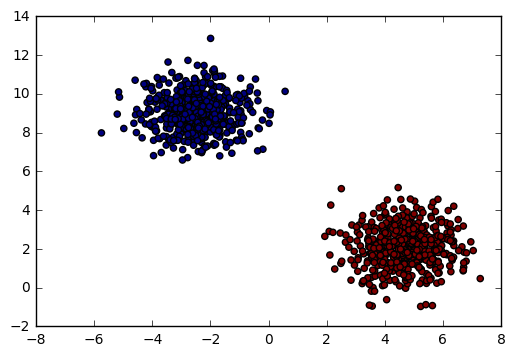

In [221]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [222]:
def distance(a,b):
    return np.sum((a-b)**2)

def knn(X,y,point,k):
    
    distances=[]
    
    for tup in zip(X,y):
        dis=distance(point,tup[0])
        distances.append((dis,tup[1]))
        
    distances=sorted(distances)
    top=np.array(distances[:k])
    vals,occ=np.unique(top[:,1],return_counts=True)
    ## argmax is for index of max item
    return vals[np.argmax(occ)]

In [223]:
point=np.array([-2,10])

In [224]:
knn(X,y,point,10)

0.0

# Made By Me KNN Class Method

In [278]:
class KNN:
    
    def __init__(self,k):
        self.k=k
        self.X=None
        self.y=None
    
    
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self,points):
        res=[]
        for point in points:
            res.append(self.predict_point(point))
        return np.array(res,dtype=int)
    
    
    def predict_point(self,points):
        distances=[]
        for X_item,y_item in zip(self.X,self.y) :
            dis=KNN.distance(points,X_item)
            distances.append((dis,y_item))
        distances=sorted(distances)
        top=np.array(distances[:self.k])
        val,count=np.unique(top[:,1],return_counts=True)
        return val[np.argmax(count)]
    
    def accuracy(self,X,y):
        return sum(self.predict(X)==y)/len(y)
    
    
    
    @classmethod
    def distance(cls,p1,p2):
        return np.sum((p2-p1)**2)
    
        
    

In [285]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)


In [291]:
model=KNeighborsClassifier(670)
model.fit(X_train,y_train)            ##This one is using KNeighborsClassifier
model.predict(X_test)
model.score(X_test,y_test)

0.48787878787878786

In [293]:
model=KNN(670)
model.fit(X_train,y_train)
model.predict(X_test)                 ##This one is using KNN Class
model.accuracy(X_test,y_test)

0.48787878787878786

In [22]:
class KNN:
    
    def __init__(self, k=10):
        self.X = None
        self.y = None
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, points):
        
        res = []
        
        for point in points:
            res.append(self.predict_point(point))
            
        return np.array(res, dtype=int)
    
    def predict_point(self, point):
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(point, x_item)
            distances.append((dis, y_item))
        
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        
        return vals[np.argmax(counts)]
    
    def accuracy(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1 - p2) ** 2)

In [23]:
model=KNN(10)

In [24]:
model.fit(X,y)

In [25]:
model.predict(X[0])

array([1, 1])

In [56]:
y[0]

0

In [57]:
for i in range(10):
    print(model.predict(X[i]))

[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]


In [58]:
y[:10]

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [59]:
from sklearn.cross_validation import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [61]:
model.fit(X_train,y_train)

In [62]:
for point in X_test[:10]:
    print(model.predict(point))

[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]


In [63]:
y_test[:10]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
model=KNeighborsClassifier(10)

In [66]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
model.score(X_test,y_test)

1.0